In [3]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl

from MyPhidlFunctions import *

In [2]:
D = Device()

FeedLine1_temp = FeedLineMaker(6000,95,300,300,1/95,200)
FeedLine2_temp = FeedLineMaker(6000,95,300,300,2/95,200)
FeedLine3_temp = FeedLineMaker(6000,95,300,300,6/95,200)
FeedLine4_temp = FeedLineMaker(6000,95,300,300,16/95,200)
FeedLine5_temp = FeedLineMaker(6000,95,300,300,37/95,200)


FeedLine1 = D << FeedLine1_temp.movey(-3225)
FeedLine2 = D << FeedLine2_temp.movey(-3225 + 1300)
FeedLine3 = D << FeedLine3_temp.movey(-3225 + 2 * 1300)
FeedLine4 = D << FeedLine4_temp.movey(-3225 + 3 * 1300)
FeedLine5 = D << FeedLine5_temp.movey(-3225 + 4 * 1300)

BoundingBox = D.bbox
CenterX =(BoundingBox[1][0]-BoundingBox[0][0])/2


FeedLine1.movex(CenterX-FeedLine1.center[0])
FeedLine2.movex(CenterX-FeedLine2.center[0])
FeedLine3.movex(CenterX-FeedLine3.center[0])
FeedLine4.movex(CenterX-FeedLine4.center[0])
FeedLine5.movex(CenterX-FeedLine5.center[0])

BarLength = 1800
BarWidth = 50
BondPadLength = 200
BondPadWidth = 200
ProbeLength = 300
ProbeWidth = 10
Spacing = 100

BarLength2 = 1200
BarWidth2 = 50
BondPadLength2 = 200
BondPadWidth2 = 200
ProbeLength2 = 300
ProbeWidth2 = 10
Spacing2 = 100


FourProbe1 = FourProbeMaker(BarLength, BarWidth, BondPadLength, BondPadWidth, ProbeLength, ProbeWidth, Spacing)
FourProbe2 = FourProbeMaker(BarLength2, BarWidth2, BondPadLength2, BondPadWidth2, ProbeLength2, ProbeWidth2, Spacing2)

D << FourProbe1.move([4250,-3225 + 5 * 1300 - 200])
D << FourProbe2.move([1250,-3225 + 5 * 1300 - 200])

#D.write_gds('FeedLineTest001')

qp(D)

AttributeError: 'tuple' object has no attribute 'movey'

In [ ]:
SchusterResonator(NumberOfBends[i]
                                                    ,HorizontalBarLength[i]
                                                    ,VerticalBarLength[i]
                                                    ,EndTailLength[i]
                                                    ,ResonatorWidth[i]
                                                    ,CouplingCapacitorWidth[i]
                                                    ,CouplingCapacitorTopBarLength[i]
                                                    ,CouplingCapacitorSideWallsLength[i]
                                                    ,Spacing[i])


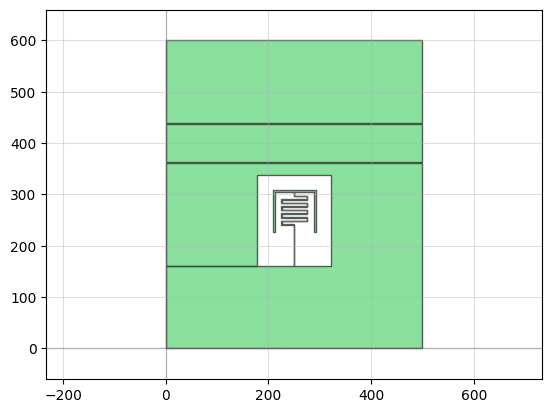

In [18]:
D = Device()

ChipSize = [500,600]
FeedLineWidth = 75
FeedLineSpacing = 2
ResonatorDisplacementFromCenter = -50
FeedLineDisplacementFromCenter = 100

Chip = pg.rectangle(size = ChipSize,layer = 0)
Chip_ref = D << Chip
DeviceCenter = Chip_ref.center

FeedLineSpacingTop = pg.rectangle(size = (ChipSize[0],FeedLineSpacing),layer = 0)
FeedLineSpacingBottom = pg.rectangle(size = (ChipSize[0],FeedLineSpacing),layer = 0)
FeedLineSpacingTop_ref = D << FeedLineSpacingTop
FeedLineSpacingBottom_ref = D << FeedLineSpacingBottom
FeedLineSpacingBottom_Center = FeedLineSpacingBottom_ref.center

FeedLineSpacingBottom_ref.move(DeviceCenter-FeedLineSpacingBottom_Center)
FeedLineSpacingTop_ref.move(DeviceCenter-FeedLineSpacingBottom_Center)
FeedLineSpacingBottom_ref.movey((-(FeedLineWidth+FeedLineSpacing)/2)+FeedLineDisplacementFromCenter)
FeedLineSpacingTop_ref.movey(((FeedLineWidth+FeedLineSpacing)/2)+FeedLineDisplacementFromCenter)

ResonatorDevice, a, b, ResonatorLength = SchusterResonator(NumberOfBends = 7
                                                    ,HorizontalBarLength = 50
                                                    ,VerticalBarLength = 7
                                                    ,EndTailLength = 80
                                                    ,ResonatorWidth = 1
                                                    ,CouplingCapacitorWidth = 4
                                                    ,CouplingCapacitorTopBarLength = 80
                                                    ,CouplingCapacitorSideWallsLength = 80
                                                    ,Spacing = 30)




ResonatorDevice_ref = D << ResonatorDevice
ResonatorCenter = ResonatorDevice_ref.center

ResonatorDevice_ref.move(DeviceCenter-ResonatorCenter)
ResonatorDevice_ref.movey(ResonatorDisplacementFromCenter)

Etched_Device = Device()


EtchedArea = pg.xor_diff(A = ResonatorDevice_ref,B = Chip_ref, precision=1e-6)
EtchedArea = pg.xor_diff(A = FeedLineSpacingBottom_ref,B = EtchedArea, precision=1e-6)
EtchedArea = pg.xor_diff(A = FeedLineSpacingTop_ref,B = EtchedArea, precision=1e-6)

EtchedArea.write_gds('20240216_QDev1327ResSim01')
qp(EtchedArea)













[1398.0, 1368.0, 1338.0, 1227.0, 1197.0, 1056.0, 885.0, 714.0, 684.0, 543.0, 513.0, 483.0]


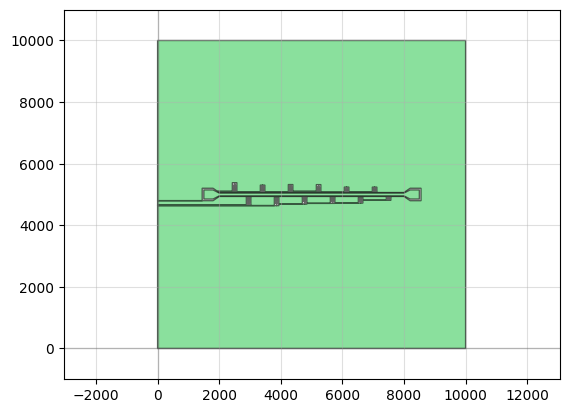

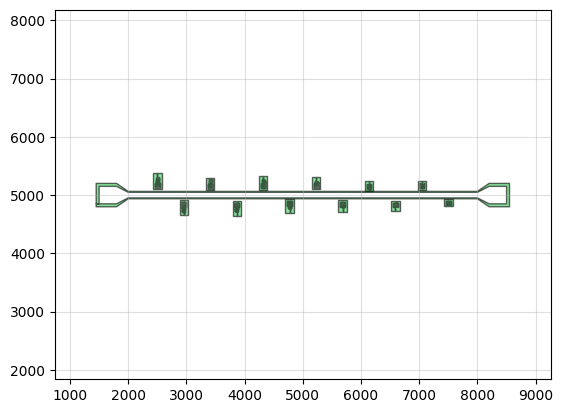

In [8]:
D = Device()

ChipSize = [10000,10000]
FeedLineWidth = 95
FeedLineSpacing = 16
ResonatorDisplacementFromCenter = -50

Chip = pg.rectangle(size = ChipSize,layer = 0)
Chip_ref = D << Chip
DeviceCenter = Chip_ref.center

CenterCoord = [ChipSize[0]/2,ChipSize[1]/2]

#Feed Line
FeedLineWidth = 95
FeedLineSpacing = 16
FeedLineLength = 6000
TransitionLength = 200
BondPadLength = 300
BondPadWidth = 300

FeedLineEtch = FeedLineMaker(FeedLineWidth,FeedLineSpacing,FeedLineLength,TransitionLength,BondPadLength,BondPadWidth)
FeedLine_ref = D << FeedLineEtch
FeedLine_CenterCoord = np.average(FeedLine_ref.bbox,axis=0)
FeedLine_ref.move(CenterCoord-FeedLine_CenterCoord)

Chip_ref = pg.xor_diff(A = FeedLine_ref,B = Chip_ref, precision=1e-6)

#Resonator 1
NumOfResonators =                   12
NumberOfBends =                     np.array([22,22,22,19,19,16,13,10,10,7,7,7])
HorizontalBarLength =               np.array([50]*12)
VerticalBarLength =                 np.array([7]*12)
EndTailLength =                     np.array([80,50,20,80,50,80,80,80,50,80,50,20])
ResonatorWidth =                    np.array([1]*12)
CouplingCapacitorWidth =            np.array([4]*12)
CouplingCapacitorTopBarLength =     np.array([80]*12)
CouplingCapacitorSideWallsLength =  np.array([80]*12)
Spacing =                           np.array([30]*12)

DistFromFeedline =                  np.array([-100, -90, -80, -100, -90, -70, -100, -90, -70, -100, -90, -70])
DistanceX =                         np.linspace(-2500,2500,12)
MoveVectorFromCenter =              [DistanceX,DistFromFeedline]
Orientaion =                        np.array([0,1,0,1,0,1,0,1,0,1,0,1])

Lengths = []
for i in range(NumOfResonators):

    #Resonator
    Res_Device, a, b, Res_Length = SchusterResonator(NumberOfBends[i]
                                                    ,HorizontalBarLength[i]
                                                    ,VerticalBarLength[i]
                                                    ,EndTailLength[i]
                                                    ,ResonatorWidth[i]
                                                    ,CouplingCapacitorWidth[i]
                                                    ,CouplingCapacitorTopBarLength[i]
                                                    ,CouplingCapacitorSideWallsLength[i]
                                                    ,Spacing[i])

    Lengths.append(Res_Length)
    Res_Device_ref = D << Res_Device
    MoveVectorFromCenter = [DistanceX[i],DistFromFeedline[i]]
    MoveVector = ResonatorMover(Chip_ref,Res_Device_ref,MoveVectorFromCenter)
    Res_Device_ref.move(MoveVector)

    if Orientaion[i] == 0:
        Res_Device_ref.mirror(CenterCoord,CenterCoord+np.array([1,0]))

    Chip_ref = pg.xor_diff(A = Res_Device_ref,B = Chip_ref, precision=1e-6)

Chip_ref2 = D << Chip
ChipInveted_ref = pg.xor_diff(A = Chip_ref2,B = Chip_ref, precision=1e-6)


#Chip_ref.write_gds('ResonatorDevice')
#ChipInveted_ref.write_gds('InvertedResonatorDevice')

print(Lengths)
qp(Chip_ref)
qp(ChipInveted_ref)













[1398.0, 1368.0, 1338.0, 1227.0, 1197.0, 1056.0, 885.0, 714.0, 684.0, 543.0, 513.0, 483.0]


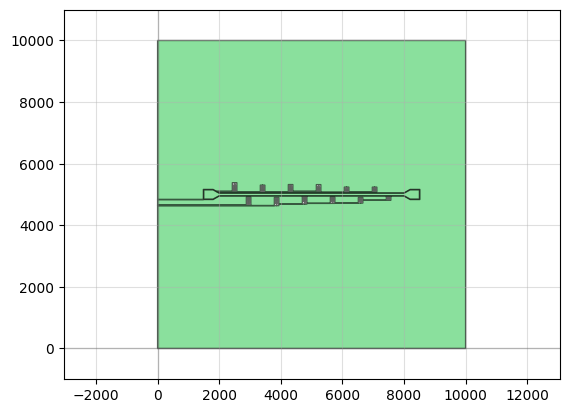

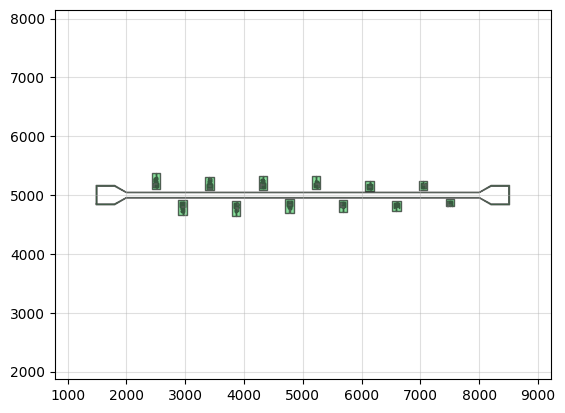

In [22]:
D = Device()

ChipSize = [10000,10000]
FeedLineWidth = 75
FeedLineSpacing = 2
ResonatorDisplacementFromCenter = -50

Chip = pg.rectangle(size = ChipSize,layer = 0)
Chip_ref = D << Chip
DeviceCenter = Chip_ref.center

CenterCoord = [ChipSize[0]/2,ChipSize[1]/2]

#Feed Line
FeedLineWidth = 85
FeedLineSpacing = 4
FeedLineLength = 6000
TransitionLength = 200
BondPadLength = 300
BondPadWidth = 300

FeedLineEtch = FeedLineMaker(FeedLineWidth,FeedLineSpacing,FeedLineLength,TransitionLength,BondPadLength,BondPadWidth)
FeedLine_ref = D << FeedLineEtch
FeedLine_CenterCoord = np.average(FeedLine_ref.bbox,axis=0)
FeedLine_ref.move(CenterCoord-FeedLine_CenterCoord)

Chip_ref = pg.xor_diff(A = FeedLine_ref,B = Chip_ref, precision=1e-6)

#Resonator 1
NumOfResonators =                   12
NumberOfBends =                     np.array([22,22,22,19,19,16,13,10,10,7,7,7])
HorizontalBarLength =               np.array([50]*12)
VerticalBarLength =                 np.array([7]*12)
EndTailLength =                     np.array([80,50,20,80,50,80,80,80,50,80,50,20])
ResonatorWidth =                    np.array([1.5]*12)
CouplingCapacitorWidth =            np.array([4]*12)
CouplingCapacitorTopBarLength =     np.array([80]*12)
CouplingCapacitorSideWallsLength =  np.array([80]*12)
Spacing =                           np.array([30]*12)

DistFromFeedline =                  np.array([-100, -90, -80, -100, -90, -70, -100, -90, -70, -100, -90, -70])
DistanceX =                         np.linspace(-2500,2500,12)
MoveVectorFromCenter =              [DistanceX,DistFromFeedline]
Orientaion =                        np.array([0,1,0,1,0,1,0,1,0,1,0,1])

Lengths = []
for i in range(NumOfResonators):

    #Resonator
    Res_Device, a, b, Res_Length = SchusterResonator(NumberOfBends[i]
                                                    ,HorizontalBarLength[i]
                                                    ,VerticalBarLength[i]
                                                    ,EndTailLength[i]
                                                    ,ResonatorWidth[i]
                                                    ,CouplingCapacitorWidth[i]
                                                    ,CouplingCapacitorTopBarLength[i]
                                                    ,CouplingCapacitorSideWallsLength[i]
                                                    ,Spacing[i])

    Lengths.append(Res_Length)
    Res_Device_ref = D << Res_Device
    MoveVectorFromCenter = [DistanceX[i],DistFromFeedline[i]]
    MoveVector = ResonatorMover(Chip_ref,Res_Device_ref,MoveVectorFromCenter)
    Res_Device_ref.move(MoveVector)

    if Orientaion[i] == 0:
        Res_Device_ref.mirror(CenterCoord,CenterCoord+np.array([1,0]))

    Chip_ref = pg.xor_diff(A = Res_Device_ref,B = Chip_ref, precision=1e-6)

Chip_ref2 = D << Chip
ChipInveted_ref = pg.xor_diff(A = Chip_ref2,B = Chip_ref, precision=1e-6)


#Chip_ref.write_gds('ResonatorDevice')
ChipInveted_ref.write_gds('20240216_Qdev1327Res02')

print(Lengths)
qp(Chip_ref)
qp(ChipInveted_ref)

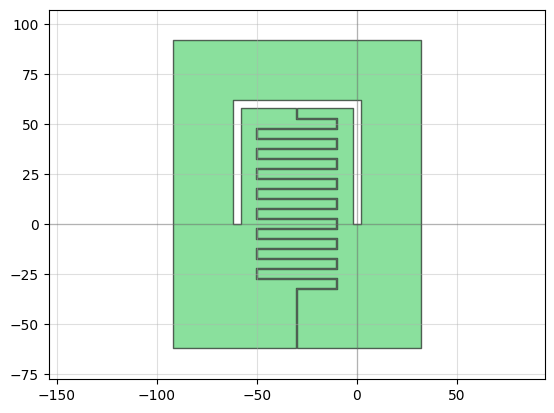

In [24]:
D = Device()
ResonatorDevice, a, b, ResonatorLength = SchusterResonator(ResonatorWidth=0.5)
ResonatorDevice_ref = D << ResonatorDevice

D.write_gds('ResonatorForDoseTest')
qp(ResonatorDevice_ref)













[2970.0, 2940.0, 2910.0, 3370.0, 3340.0, 3770.0, 4170.0, 4570.0, 4540.0, 4970.0, 4940.0, 4910.0]


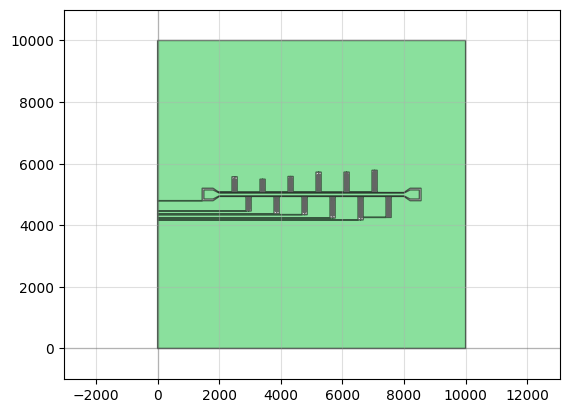

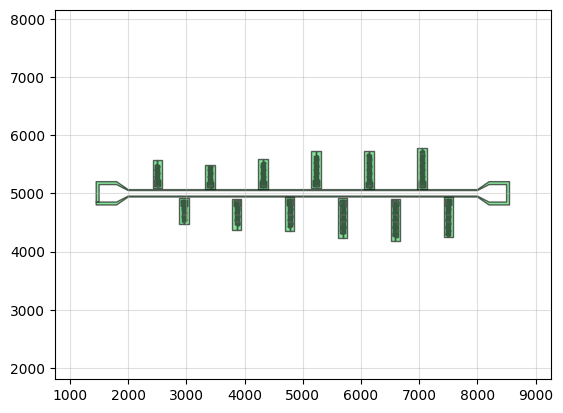

In [29]:
D = Device()

ChipSize = [10000,10000]
FeedLineWidth = 95
FeedLineSpacing = 16
ResonatorDisplacementFromCenter = -50

Chip = pg.rectangle(size = ChipSize,layer = 0)
Chip_ref = D << Chip
DeviceCenter = Chip_ref.center

CenterCoord = [ChipSize[0]/2,ChipSize[1]/2]

#Feed Line
FeedLineWidth = 95
FeedLineSpacing = 16
FeedLineLength = 6000
TransitionLength = 200
BondPadLength = 300
BondPadWidth = 300

FeedLineEtch = FeedLineMaker(FeedLineWidth,FeedLineSpacing,FeedLineLength,TransitionLength,BondPadLength,BondPadWidth)
FeedLine_ref = D << FeedLineEtch
FeedLine_CenterCoord = np.average(FeedLine_ref.bbox,axis=0)
FeedLine_ref.move(CenterCoord-FeedLine_CenterCoord)

Chip_ref = pg.xor_diff(A = FeedLine_ref,B = Chip_ref, precision=1e-6)

#Resonator 1
NumOfResonators =                   12
NumberOfBends =                     np.array([35,35,35,40,40,45,50,55,55,60,60,60])
HorizontalBarLength =               np.array([70]*12)
VerticalBarLength =                 np.array([10]*12)
EndTailLength =                     np.array([80,50,20,80,50,80,80,80,50,80,50,20])
ResonatorWidth =                    np.array([0.5]*12)
CouplingCapacitorWidth =            np.array([4]*12)
CouplingCapacitorTopBarLength =     np.array([100]*12)
CouplingCapacitorSideWallsLength =  np.array([100]*12)
Spacing =                           np.array([30]*12)

DistFromFeedline =                  np.array([-90, -80, -70, -90, -80, -70, -90, -80, -70, -90, -80, -70])
DistanceX =                         np.linspace(-2500,2500,12)
MoveVectorFromCenter =              [DistanceX,DistFromFeedline]
Orientaion =                        np.array([0,1,0,1,0,1,0,1,0,1,0,1])

Lengths = []
for i in range(NumOfResonators):

    #Resonator
    Res_Device, a, b, Res_Length = SchusterResonator(NumberOfBends[i]
                                                    ,HorizontalBarLength[i]
                                                    ,VerticalBarLength[i]
                                                    ,EndTailLength[i]
                                                    ,ResonatorWidth[i]
                                                    ,CouplingCapacitorWidth[i]
                                                    ,CouplingCapacitorTopBarLength[i]
                                                    ,CouplingCapacitorSideWallsLength[i]
                                                    ,Spacing[i])

    Lengths.append(Res_Length)
    Res_Device_ref = D << Res_Device
    MoveVectorFromCenter = [DistanceX[i],DistFromFeedline[i]]
    MoveVector = ResonatorMover(Chip_ref,Res_Device_ref,MoveVectorFromCenter)
    Res_Device_ref.move(MoveVector)

    if Orientaion[i] == 0:
        Res_Device_ref.mirror(CenterCoord,CenterCoord+np.array([1,0]))

    Chip_ref = pg.xor_diff(A = Res_Device_ref,B = Chip_ref, precision=1e-6)

Chip_ref2 = D << Chip
ChipInveted_ref = pg.xor_diff(A = Chip_ref2,B = Chip_ref, precision=1e-6)


Chip_ref.write_gds('ResonatorDevice02')
ChipInveted_ref.write_gds('InvertedResonatorDevice02')

print(Lengths)
qp(Chip_ref)
qp(ChipInveted_ref)













[1130.0, 1100.0, 1070.0, 970.0, 940.0, 810.0, 650.0, 490.0, 460.0, 410.0, 380.0, 350.0]


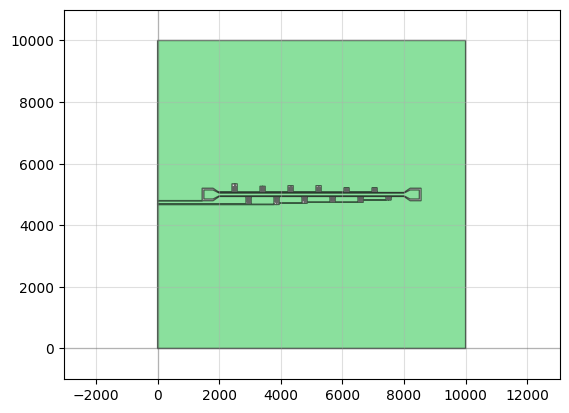

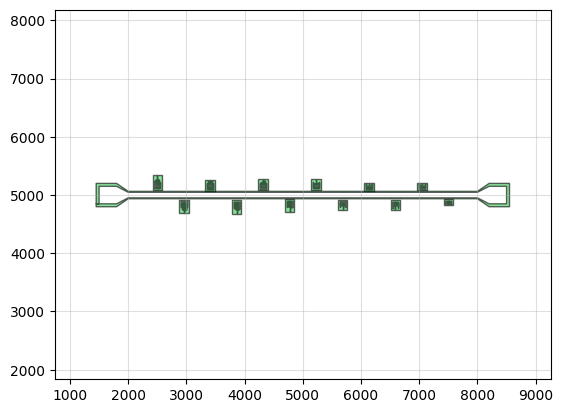

In [38]:
D = Device()

ChipSize = [10000,10000]
FeedLineWidth = 95
FeedLineSpacing = 16
ResonatorDisplacementFromCenter = -50

Chip = pg.rectangle(size = ChipSize,layer = 0)
Chip_ref = D << Chip
DeviceCenter = Chip_ref.center

CenterCoord = [ChipSize[0]/2,ChipSize[1]/2]

#Feed Line
FeedLineWidth = 95
FeedLineSpacing = 16
FeedLineLength = 6000
TransitionLength = 200
BondPadLength = 300
BondPadWidth = 300

FeedLineEtch = FeedLineMaker(FeedLineWidth,FeedLineSpacing,FeedLineLength,TransitionLength,BondPadLength,BondPadWidth)
FeedLine_ref = D << FeedLineEtch
FeedLine_CenterCoord = np.average(FeedLine_ref.bbox,axis=0)
FeedLine_ref.move(CenterCoord-FeedLine_CenterCoord)

Chip_ref = pg.xor_diff(A = FeedLine_ref,B = Chip_ref, precision=1e-6)

#Resonator 1
NumOfResonators =                   12
NumberOfBends =                     np.array([12,12,12,10,10,8,6,4,4,3,3,3])
HorizontalBarLength =               np.array([70]*12)
VerticalBarLength =                 np.array([10]*12)
EndTailLength =                     np.array([80,50,20,80,50,80,80,80,50,80,50,20])
ResonatorWidth =                    np.array([0.5]*12)
CouplingCapacitorWidth =            np.array([4]*12)
CouplingCapacitorTopBarLength =     np.array([100]*12)
CouplingCapacitorSideWallsLength =  np.array([100]*11)
CouplingCapacitorSideWallsLength = np.append(CouplingCapacitorSideWallsLength,65)
Spacing =                           np.array([30]*12)

DistFromFeedline =                  np.array([-90, -80, -70, -90, -80, -70, -90, -80, -70, -90, -80, -70])
DistanceX =                         np.linspace(-2500,2500,12)
MoveVectorFromCenter =              [DistanceX,DistFromFeedline]
Orientaion =                        np.array([0,1,0,1,0,1,0,1,0,1,0,1])

Lengths = []
for i in range(NumOfResonators):

    #Resonator
    Res_Device, a, b, Res_Length = SchusterResonator(NumberOfBends[i]
                                                    ,HorizontalBarLength[i]
                                                    ,VerticalBarLength[i]
                                                    ,EndTailLength[i]
                                                    ,ResonatorWidth[i]
                                                    ,CouplingCapacitorWidth[i]
                                                    ,CouplingCapacitorTopBarLength[i]
                                                    ,CouplingCapacitorSideWallsLength[i]
                                                    ,Spacing[i])

    Lengths.append(Res_Length)
    Res_Device_ref = D << Res_Device
    MoveVectorFromCenter = [DistanceX[i],DistFromFeedline[i]]
    MoveVector = ResonatorMover(Chip_ref,Res_Device_ref,MoveVectorFromCenter)
    Res_Device_ref.move(MoveVector)

    if Orientaion[i] == 0:
        Res_Device_ref.mirror(CenterCoord,CenterCoord+np.array([1,0]))

    Chip_ref = pg.xor_diff(A = Res_Device_ref,B = Chip_ref, precision=1e-6)

Chip_ref2 = D << Chip
ChipInveted_ref = pg.xor_diff(A = Chip_ref2,B = Chip_ref, precision=1e-6)


Chip_ref.write_gds('ResonatorDevice03')
ChipInveted_ref.write_gds('InvertedResonatorDevice03')

print(Lengths)
qp(Chip_ref)
qp(ChipInveted_ref)

In [36]:
CouplingCapacitorSideWallsLength =  np.array([100]*11)
np.append(CouplingCapacitorSideWallsLength,65)


array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,  65])